<a href="https://colab.research.google.com/github/HasanKaptanoglu/MedicalCostAnalysis/blob/main/MedicalCostAnalysis_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [4]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [5]:
#I imported the dataset, copied it and made a head to check out how it looks
insurance = pd.read_csv("/content/insurance.csv")
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#seeing if there are any missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

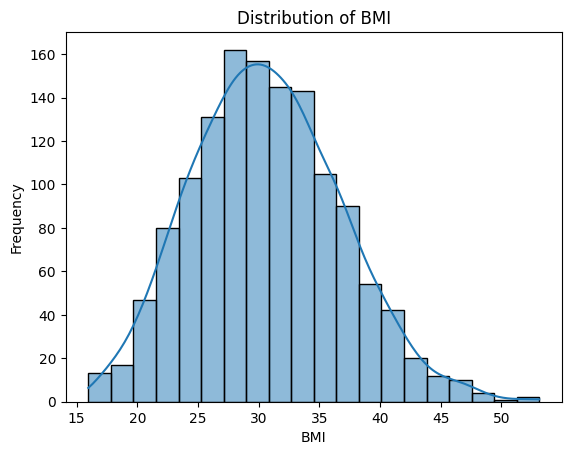

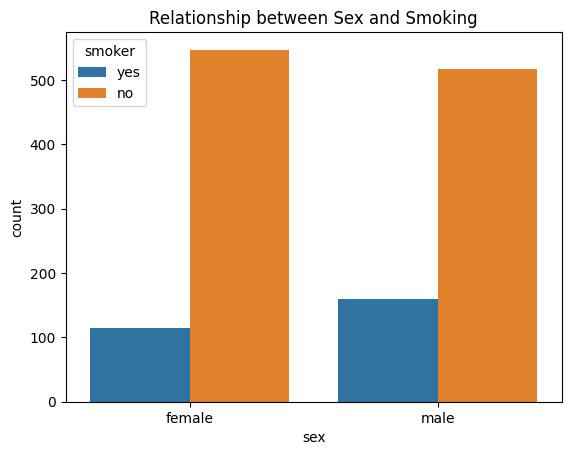

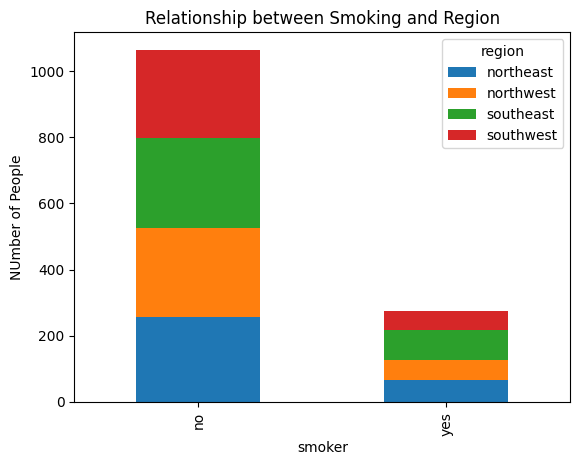

Text(0.5, 1.0, 'Relationship between Regions and BMI')

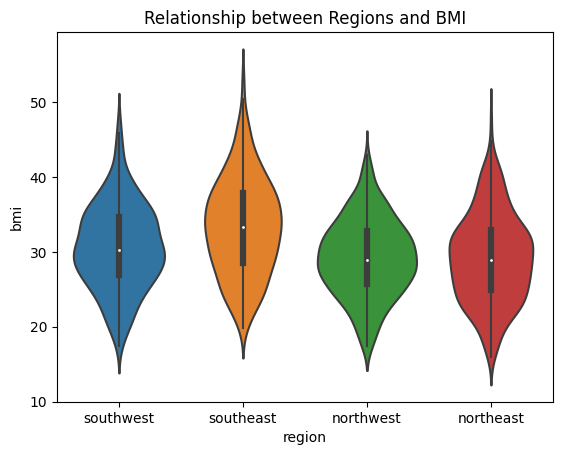

In [7]:
#Making some visuals to better dive into the data

#Distribution of BMI
bmi_data = df["bmi"]
sns.histplot(bmi_data, bins=20, kde=True)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")
plt.show()

#Relationship between sex and smoking, regions and smoking, charges and smoking

sns.countplot(data=df, x="sex", hue="smoker")
plt.title("Relationship between Sex and Smoking")


ct = pd.crosstab(df["smoker"], df["region"])
ct.plot(kind="bar", stacked=True)
plt.title("Relationship between Smoking and Region")
plt.ylabel("NUmber of People")
plt.show()

sns.violinplot(data=df, x="region", y="bmi")
plt.title("Relationship between Regions and BMI")

# In the first graph we see that the dataset is made up of mostly from people with BMI 25 to 35
# In the second graph we see both the dataset is made up of mostly non-smoking people and male smokers.
# In the third graph we see that the southeast region is made up of more smoker percentage than other areas in our dataset
# In the fourth graph we see that the again southeast region is made up of higher average BMI than other areas in our dataset.

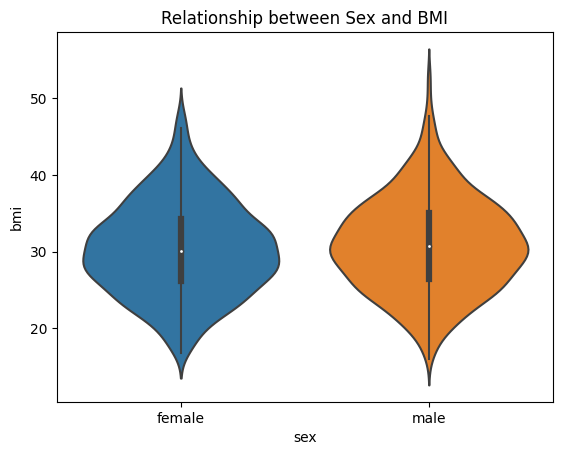

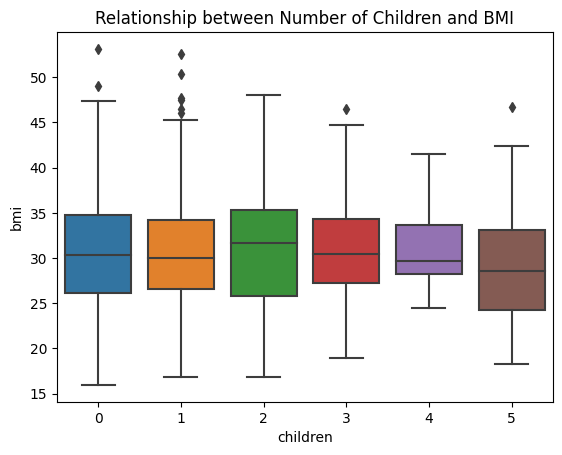

Text(0.5, 1.0, 'Relationship between a persons BMI and their hospital Charges')

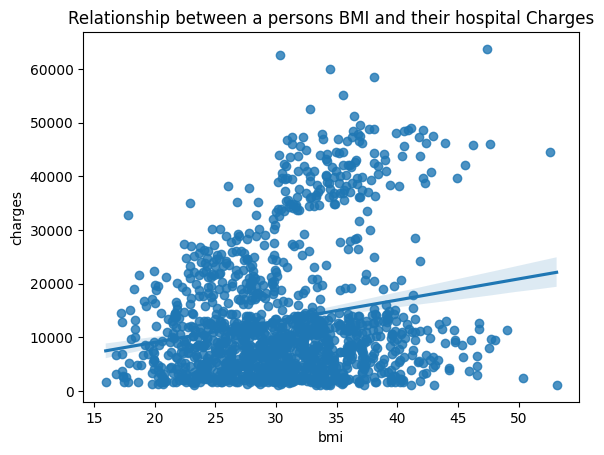

In [8]:
#More graphs

#Relationship between sex and bmi, number of children and bmi, charges and bmi
sns.violinplot(data=df, x="sex", y="bmi")
plt.title("Relationship between Sex and BMI")
plt.show()


sns.boxplot(data=df, x="children", y="bmi")
plt.title("Relationship between Number of Children and BMI")
plt.show()


sns.regplot(data=df, x="bmi", y="charges")
plt.title("Relationship between a persons BMI and their hospital Charges")

#First graph shows both that there is a more range of BMI in man and man seem to have a slightly more average BMI than women in our dataset.
#Second graph shows that BMI and number of children doesn't seem to correlate in our dataset.
#Third graph shows that as your BMI goes up so does your hospital charges in our dataset.

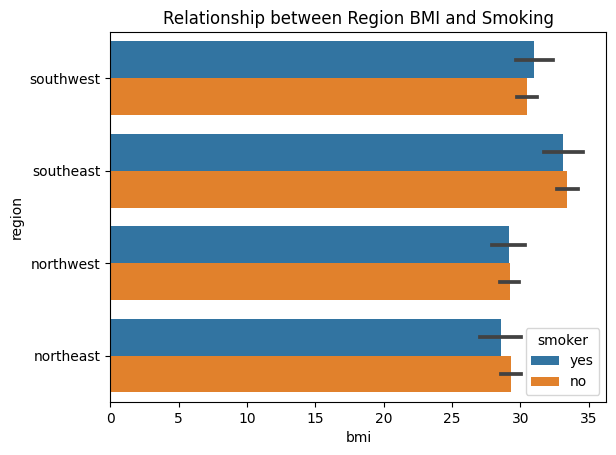

In [9]:
#One more graph

#Relationship between Region, BMI and Smoking
sns.barplot(data=df, x="bmi" , y="region", hue="smoker")
plt.title("Relationship between Region BMI and Smoking")
plt.show()

#It seems that except in the southwest region smokers tend to have less BMI than non-smokers in our dataset

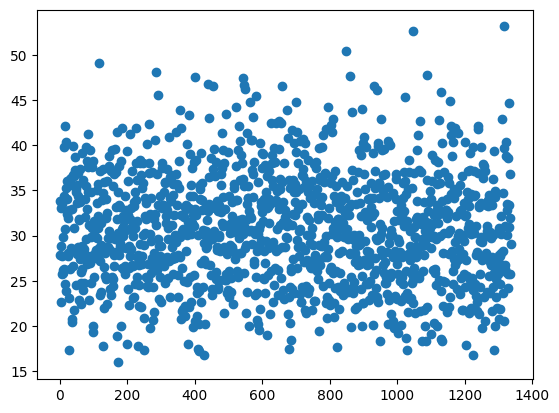

In [10]:
#A graph to help us identify some of the outliers in BMI. As you can see although not much there are some outliers in our BMI

plt.scatter(df.index,df["bmi"])


In [11]:
#Here I used an encoder to preprocess my data to ready its use.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in df.columns:
  if df[column].dtype == 'object':
        df[column + '_encoded'] = encoder.fit_transform(df[column])

df.head()




,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [12]:
# Here i made another copy before dropping unnecessary rows and scaling my dataset

dfcopy = df.copy()

dfcopy.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [13]:
# Dropping unnecessary rows

df = df.drop("sex", axis=1)
df = df.drop("smoker", axis=1)
df = df.drop("region", axis=1)

df.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [14]:
# Splitting the data to train and test

from sklearn.model_selection import train_test_split

y = df["charges"]
X = df.drop("charges", axis=1)

# I tried test_sizes 0.25 and 0.20 too but got the best results with 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of X_train: 936
Size of X_test: 402
Size of y_train: 936
Size of y_test: 402


In [15]:
#Scaling the data

  # from sklearn.preprocessing import StandardScaler

  # scaler = StandardScaler()

  # X_train_scaled = scaler.fit_transform(X_train)

  # X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled

# I tried standard scaling as well but got better results with minmax, so i ocmmented the standard scaler.

array([[0.26086957, 0.21207885, 0.6       , 1.        , 1.        ,
        1.        ],
       [0.91304348, 0.44694534, 0.        , 1.        , 1.        ,
        1.        ],
       [0.26086957, 0.31077869, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.45652174, 0.48329372, 0.4       , 1.        , 0.        ,
        0.66666667],
       [0.45652174, 0.22577939, 0.6       , 0.        , 1.        ,
        0.        ],
       [0.        , 0.73241996, 0.        , 1.        , 0.        ,
        0.66666667]])

In [16]:
#Cross validating some models

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

num_folds =  5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=69)

for name, model in models:
  scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
  avg_rmse = (-scores.mean()) ** 0.5
  print(f"Model: {name}")
  print(f"Average RMSE: {avg_rmse}")


# Random Forest seems like the best model so I'll go on with that one

Model: Linear Regression
Average RMSE: 5866.980584134213
Model: Decision Tree
Average RMSE: 6134.0261150087545
Model: Random Forest
Average RMSE: 4601.588078635549


In [17]:
# Trying differt n_estimators for random forest

n_estimators= [50, 100, 150, 170, 200, 300, 500]

for n in n_estimators:
  random_forest = RandomForestRegressor(n_estimators=n, random_state=69)
  scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
  avg_rmse = (-scores.mean()) ** 0.5
  print(f"n_estimator: {n}")
  print(f"Average RMSE: {avg_rmse}")

# It seems that as n_estimator goes higher we get better results but after 300 it doesn't seem to make much difference and it might not be worth it to go that high.

n_estimator: 50
Average RMSE: 4606.437032365324
n_estimator: 100
Average RMSE: 4601.476282532314
n_estimator: 150
Average RMSE: 4607.124455050498
n_estimator: 170
Average RMSE: 4600.972332444581
n_estimator: 200
Average RMSE: 4594.733333815769
n_estimator: 300
Average RMSE: 4586.125476434998
n_estimator: 500
Average RMSE: 4582.590630964569


# Yeni Bölüm

In [18]:
# Getting MSE for testing some previous data points.

from sklearn.metrics import mean_squared_error

random_forest = RandomForestRegressor(n_estimators=300, random_state=69)

random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 29350506.27431532


R2: 0.8186191221527176


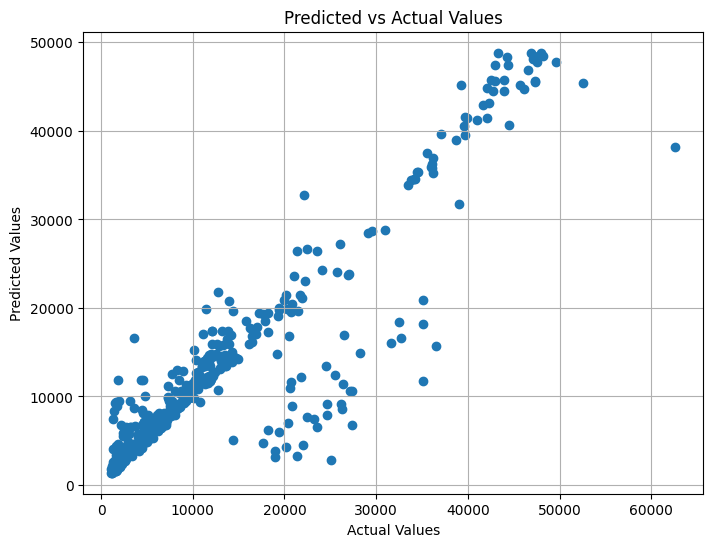

In [19]:
# Getting an initial r2 score and making a graph to see how well we did our predictions

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2:", r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()


# We didn't do that badly, but it can use some more work.

In [20]:
# Making a grid search for optimizing parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300,],
    "max_depth": [None, 10, 20, 50, 100],
    "min_samples_split": [2, 5, 10, 20, 50, 100],
    "min_samples_leaf" : [1 ,3 ,5 ,10 ,15],
    "max_features": [None, "sqrt", "log2"],
    "bootstrap": [True, False],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=69), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=69),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 20, 50, 100],
                         'n_estimators': [50, 100, 200, 300]})

In [25]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:",best_params)
print("Best Score:",best_score)


Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8710632591423835


In [26]:
# Getting a randomized search for optimizing parameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    "n_estimators": randint(50, 150, 300),
    "max_depth": [None, 10, 20, 50, 100, 200],
    "min_samples_split": randint(2, 10, 20),
    "max_features": uniform(0, 1),
    "min_samples_leaf" : randint(1,10),

}

randomized_search = RandomizedSearchCV(RandomForestRegressor(random_state=69), param_dist, n_iter=10, cv=5)
randomized_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=69),
                   param_distributions={'max_depth': [None, 10, 20, 50, 100,
                                                      200],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cbcef7b2bf0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cbcede9ef50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cbd2a1dcca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cbcef7dd690>})

In [27]:
best_params = randomized_search.best_params_
best_score = randomized_search.best_score_

print("Best Parameters:",best_params)
print("Best Score:",best_score)

# I got slightly bit better score with grid search parameters

Best Parameters: {'max_depth': 50, 'max_features': 0.842259063332348, 'min_samples_leaf': 9, 'min_samples_split': 22, 'n_estimators': 397}
Best Score: 0.8709755121713808


In [50]:
# I adjusted the parameters

random_forest_best_params = RandomForestRegressor(n_estimators=300, max_depth=20, max_features = 0.92, min_samples_split=20, random_state=69, min_samples_leaf = 9, bootstrap=True)

random_forest_best_params.fit(X_train_scaled, y_train)

y_pred = random_forest_best_params.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

# We got a slightly beter scores this time.

Mean Squared Error: 26811888.93190601
R2: 0.8343073231595767


In [269]:
# I used Z-Score to get rid of some outliers

mean = np.mean(df)
std = np.std(df)

z_score = (df-mean) / std

#I tested around a bit and found 3 works the best
z_score_threshold = 3
outliers = np.abs(z_score) > z_score_threshold

# Got a new Dataframe without the outliers
data_no_outliers = df[~outliers]

data_no_outliers_cleaned = data_no_outliers.dropna()

data_no_outliers_cleaned

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0.0,16884.92400,0,1,3
1,18,33.770,1.0,1725.55230,1,0,2
2,28,33.000,3.0,4449.46200,1,0,2
3,33,22.705,0.0,21984.47061,1,0,1
4,32,28.880,0.0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3.0,10600.54830,1,0,1
1334,18,31.920,0.0,2205.98080,0,0,0
1335,18,36.850,0.0,1629.83350,0,0,2
1336,21,25.800,0.0,2007.94500,0,0,3


Mean Squared Error: 8996903.637236524
R2: 0.9375161635687081


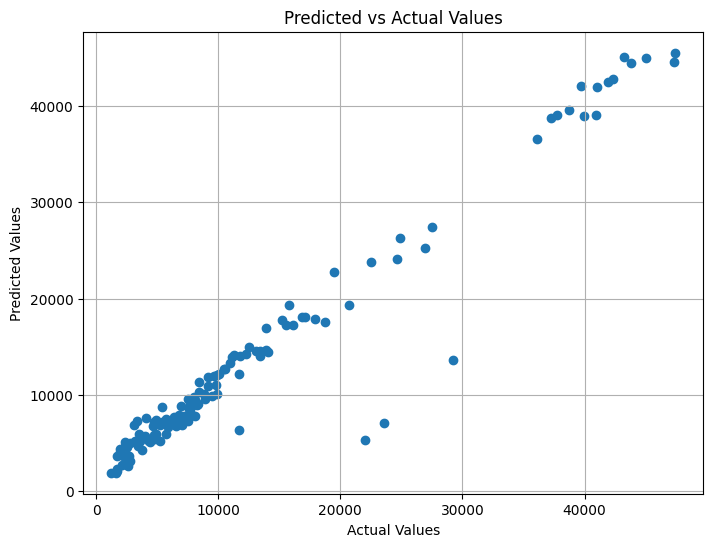

In [272]:
# I used the Dataframe without the outliers to train the new model

y_last = data_no_outliers_cleaned["charges"]
X_last = data_no_outliers_cleaned.drop("charges", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_last, y_last, random_state=69, test_size = 0.1)

# I scaled the new data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

# I used the previous searches and than I made some fine adjustments to it, and saw that these numbers worked best
no_outlier_forest = RandomForestRegressor(n_estimators=175, max_depth=20, max_features = 0.90, min_samples_split=10, random_state=69, min_samples_leaf = 13, bootstrap=True)

no_outlier_forest.fit(X_train_scaled, y_train)

y_pred = no_outlier_forest.predict(X_test_scaled)

#Last checks to see how we did
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()

# As we can see the model works much better now.